# Analysing Public Speaking Skills in TED Talks

<b>Aim</b>: 
- Perform EDA on TED Talks dataset (downloaded from https://www.kaggle.com/rounakbanik/ted-talks).
- Compute engagement scores on the TED audio files. 
- Analyse patterns in speech features corresponding to the engagement scores.

Note: The TED audio files were downloaded using the following scraper code.

https://github.com/The-Gupta/TED-Scraper/blob/master/Scraper.ipynb

It is observed that the first 20 seconds of each talk is usually the introduction of the speaker and the last 10 seconds of the audio file consists of claps. In order to avoid this noise, the these segments are not considered while loading the audio files for preprocessing (in extract_features.py). Also, only the first five minutes of the talk is considered for analysis (excluding introduction and claps). All the files with duration less than 330 seconds are discarded. 

In [1]:
#Importing necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import ast
import seaborn as sns
from pandas_profiling import ProfileReport
import plotly.express as px
from collections import defaultdict
import numpy as np
from pandas.plotting import parallel_coordinates
import ast
import os

In [60]:
!pip3 install --user chart_studio

     |████████████████████████████████| 64 kB 524 kB/s eta 0:00:01
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11448 sha256=d0c23e04e4d57f3872a79c62eb21b1633e46fbc6676342a2c09ad09132424f9e
  Stored in directory: /home/mounika.k/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying
You should consider upgrading via the '/home/mounika.k/miniconda3/envs/vidlankd/bin/python -m pip install --upgrade pip' command.


In [65]:
import chart_studio.plotly as py


In [2]:
df = pd.read_csv('../data/merged_ted_final.csv') #CSV file obtained by merging the metadata obtained from the scraper code with the TED Talks Kaggle dataset 
df.head()

,Unnamed: 0,comments,description,duration_x,event_x,film_date,languages,main_speaker,name,num_speaker,...,intro_duration,ad_duration,post_ad_duration,external__duration,external__start_time,talks__player_talks__resources__h264__00__bitrate,talks__take_action,number_of__talks__take_actions,kaggle_url,label
0,0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,...,NaN,NaN,NaN,1204.0,0.0,1200.0,[],0,https://www.ted.com/talks/ken_robinson_says_sc...,1.0
1,1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,...,NaN,NaN,NaN,1018.0,0.0,1200.0,NaN,0,https://www.ted.com/talks/al_gore_on_averting_...,0.0
2,2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,...,NaN,NaN,NaN,1326.0,0.0,1200.0,NaN,0,https://www.ted.com/talks/david_pogue_says_sim...,1.0
3,3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,...,NaN,NaN,NaN,1156.0,0.0,1200.0,NaN,0,https://www.ted.com/talks/majora_carter_s_tale...,1.0
4,4,672,"Tony Robbins discusses the ""invisible forces"" ...",1305,TED2006,1138838400,36,Tony Robbins,Tony Robbins: Why we do what we do,1,...,NaN,NaN,NaN,1351.0,0.0,1200.0,NaN,0,https://www.ted.com/talks/tony_robbins_asks_wh...,1.0


In [3]:
df.columns

Index(['Unnamed: 0', 'comments', 'description', 'duration_x', 'event_x',
       'film_date', 'languages', 'main_speaker', 'name', 'num_speaker',
       'published_date', 'ratings', 'related_talks_x', 'speaker_occupation',
       'tags', 'title', 'url', 'views', 'talk__id', 'talk__name',
       'talk__description', 'view_count', 'comment_count', 'duration_y',
       'transcript', 'video_type_name', 'event_y', 'number_of__speakers',
       'speaker__id', 'speaker__name', 'speaker__description',
       'speaker__who_he_is', 'speaker__why_listen', 'speaker__what_others_say',
       'speaker__is_published', 'all_speakers_details', 'is_talk_featured',
       'has_talk_citation', 'recording_date', 'published_timestamp',
       'talks__tags', 'number_of__tags', 'language', 'native_language',
       'language_swap', 'is_subtitle_required', 'url__webpage', 'url__audio',
       'url__video', 'url__photo__talk', 'url__photo__speaker',
       'url__subtitled_videos', 'number_of__subtitled_videos',


In [4]:
del_cols = ['speaker__why_listen', 'Unnamed: 0', 'film_date', 'comment_count', 'name', 'related_talks_x', 
            'video_type_name', 'num_speaker', 'main_speaker', 'speaker__description', 'speaker__what_others_say', 
            'all_speakers_details', 'recording_date', 'talks__tags', 'number_of__tags', 'language', 'native_language',
            'language_swap', 'url', 'url__photo__talk', 'url__photo__speaker', 'talk__download_languages',
            'talk__recommendations__blurb', 'talk__recommendations', 'related_talks_y', 
            'number_of__related_talks', 'intro_duration', 'ad_duration', 'post_ad_duration',
            'external__start_time', 'talks__player_talks__resources__h264__00__bitrate', 'talks__take_action',
            'number_of__talks__take_actions', 'duration_x', 'event_x', 'published_timestamp',
            'speaker__who_he_is', 'recording_date', 'is_subtitle_required', 'url__subtitled_videos',
            'number_of__subtitled_videos', 'talk__more_resources', 'number_of__talk__more_resources', 
            'external__duration', 'has_talk_citation', 'number_of__speakers', 'url__audio', 'kaggle_url', 
            'url__webpage', 'number_of__talk__download_languages', 'number_of__talk__recommendations', 
            'url__video', 'talk__name', 'talk__description']

In [5]:
data = df[list(set(df.columns) - set(del_cols))]
data.columns

Index(['comments', 'languages', 'views', 'view_count', 'event_y', 'ratings',
       'speaker_occupation', 'speaker__name', 'label', 'transcript',
       'talk__id', 'is_talk_featured', 'tags', 'description', 'title',
       'speaker__id', 'published_date', 'duration_y', 'speaker__is_published'],
      dtype='object')

<b>Available Features</b>

 - speaker_occupation: Occupation of the speaker.
 - languages: Number of languages the talk is available in.
 - description: A quick description of the talk.
 - tags: Tags assocaited with the talk.
 - views: Number of views for the talk.
 - event_y: TED or TEDx, and the year the evnt took place.
 - is_talk_featured:
 - view_count: Number of views for the talk.
 - transcript: 
 - label: 1 for positive ratings ('Fascinating', 'Ingenious','Jaw-dropping'); 0 for negative ratings ('Longwinded','Unconvincing', 'OK')
 - ratings: A dictionary of ratings like funny, confusing, etc on the talk.
 - speaker__is_published: 
 - comments: Number of comments on the talk.
 - title: Title of the talk.
 - speaker__name
 - published_date: UNIX timestamp when the talk was published on ted.com.
 - duration_y: Duration of the talk in seconds.
 - speaker__id:
 - talk__id:

## Exploratory Data Analysis (EDA)

### What are the talks that have maximum interaction online?

Note: Here, interaction  is termed as the number of comments per views.

In [67]:
data["interaction"] = round(data["views"]/data["comments"])
interaction = data.sort_values("interaction",ascending=False).nlargest(10,"interaction")[["title","speaker__name","interaction"]]

text = [str(round(s/1000,2))+" K" for s in interaction["interaction"] ]
fig=px.bar(interaction,x="speaker__name",y="interaction",
       title="The highes tedtalks with online comments according to the views",
      color_discrete_sequence=["#333"],
           hover_data=["title"],
           labels={
               "name":"TEDTAlk Title "
           },
           height=600,
           text=text
           
      )
fig.update_layout(
# title_font_color="red",
title_font_size=15)
fig.show()
# py.iplot(fig, filename='plotly_max_interaction')

/home/mounika.k/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Number of events through years

In [7]:
data["published_date"] = pd.to_datetime(data["published_date"],unit="s")
years = data["published_date"].dt.year.value_counts().sort_values(ascending=False)

/home/mounika.k/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [8]:
fig=px.bar(x=years.index,y=years.values,
           labels={"y":"Number of events","x":"Year"},
      title="Number of events through years",
       color_discrete_sequence=["#31bf9b"],
       range_x=[1990,2018],
           text=years.values
      )
fig.add_hline(270)

/home/mounika.k/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



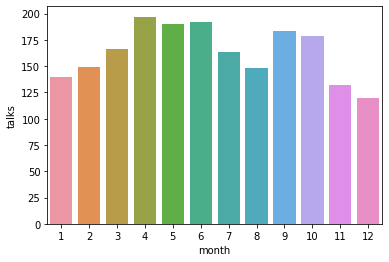

In [9]:
data['month'] = data['published_date'].dt.month

month_df = pd.DataFrame(data['month'].value_counts()).reset_index()
month_df.columns = ['month', 'talks']

month_order = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
sns.barplot(x='month', y='talks', data=month_df, order=month_order)

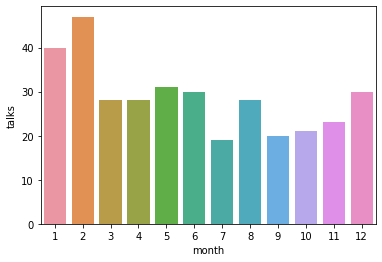

In [10]:
df_x = data[data['event_y'].str.contains('TEDx')]
x_month_df = pd.DataFrame(df_x['month'].value_counts().reset_index())
x_month_df.columns = ['month', 'talks']

month_order = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
sns.barplot(x='month', y='talks', data=x_month_df, order=month_order)

### Number of talks per year

/home/mounika.k/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



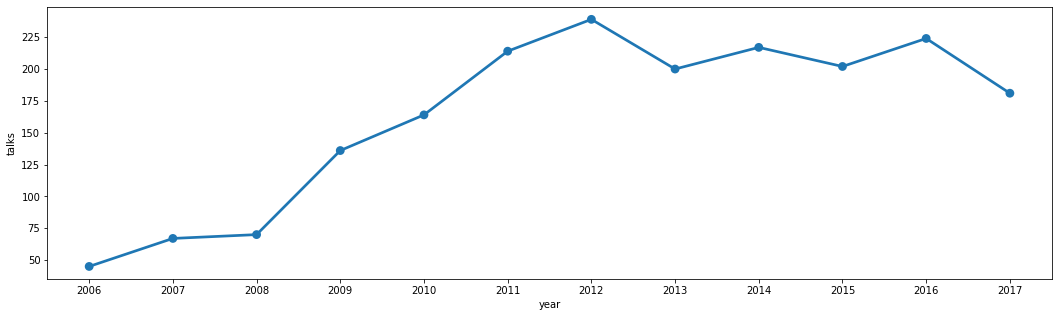

In [11]:
data['year'] = data['published_date'].dt.year

year_df = pd.DataFrame(data['year'].value_counts().reset_index())
year_df.columns = ['year', 'talks']

year_df.sort_values(by='year', inplace=True)



plt.figure(figsize=(18,5))
sns.pointplot(x='year', y='talks', data=year_df)

plt.show()

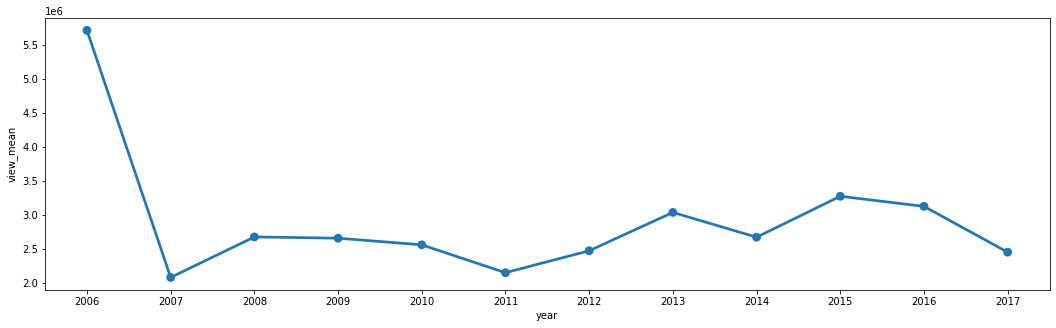

In [12]:
view_year_df = pd.DataFrame(data.groupby('year')['view_count'].mean().reset_index())
view_year_df.columns = ['year', 'view_mean']

view_year_df.sort_values(by='year', inplace=True)

plt.figure(figsize=(18,5))

sns.pointplot(x='year', y='view_mean', data=view_year_df)
plt.show()

In [13]:
talk_view_df = year_df
talk_view_df['view_mean'] = view_year_df['view_mean']

talk_view_df['talks'].corr(talk_view_df['view_mean'])

0.13106087816043244

It is observed from above that there is no correlation between the number of talks per year and the number of views during that duration

### Views per Event

In [14]:
# group the data by the event and calculate the sum
sums = data.groupby("event_y")["view_count"].agg(["sum","mean","count"]).sort_values("sum",ascending=False) .nlargest(10,"sum")

In [15]:
text = round(sums["sum"]/1000000,2)
lis = [str(s)+" M" for s in text]
fig = px.bar(sums,x=sums.index,y="sum",
           labels={"y":"Sum & mean & number of talks","x":"event"},
      title="Total number of views for event",
       color_discrete_sequence=["#192A36"],
           text=lis
      )
fig.show()

### 10 highest occupation which made a tedtalk

In [16]:
# get the value counts of each occupation
s = data["speaker_occupation"].value_counts().sort_values(ascending=False).nlargest(10)

fig = px.pie(names=s.index,values=s.values,labels={
    "names":"the occupation ",
    "values":"number of talks "
},
title="The highest 10 occupation with the number of talks",
       hole=.5
      )

In [17]:
fig.show()

In [18]:
fig.write_html('../results/occupation_talks_pie.html')

This result must be taken with a pinch of salt as a considerable number of speakers identify themselves with multiple professions (for example, writer/entrepreneur). Performing an analysis taking this into consideraion is left as an exercise to the reader.

### Do some professions tend to attract a larger number of viewers?

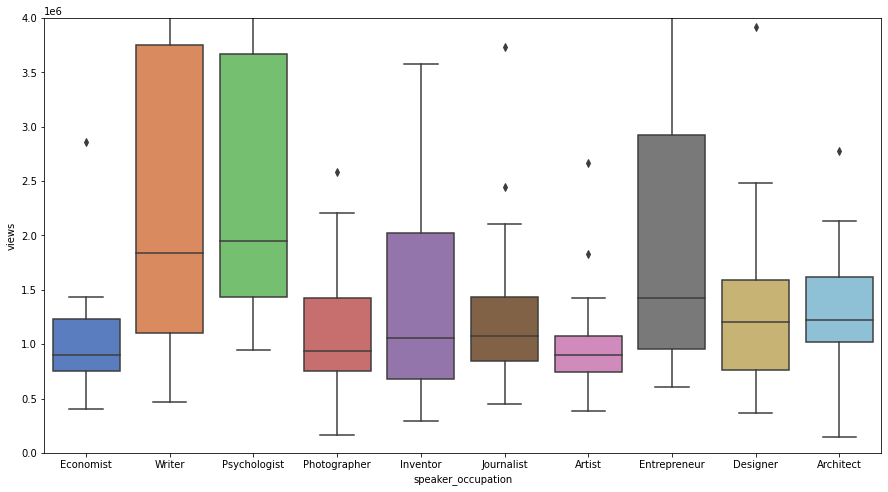

In [19]:
occupation_df = data.groupby('speaker_occupation').count().reset_index()[['speaker_occupation', 'comments']]
occupation_df.columns = ['occupation', 'appearances']
occupation_df = occupation_df.sort_values('appearances', ascending=False)

fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 8))
sns.boxplot(x='speaker_occupation', y='views', data=data[data['speaker_occupation'].isin(occupation_df.head(10)['occupation'])], palette="muted", ax =ax)
ax.set_ylim([0, 0.4e7])
plt.show()

On average, out of the top 10 most popular professions, Psychologists tend to garner the most views. Writers have the greatest range of views between the first and the third quartile..

### Top Ratings

### Tags/Themes

### Duration 

In [20]:
data['duration'] = data['duration_y'] / 60
data['duration'].describe()

/home/mounika.k/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



count    1959.000000
mean       13.608746
std         5.367578
min         2.383333
25%         9.808333
50%        14.050000
75%        17.283333
max        60.133333
Name: duration, dtype: float64

In [21]:
data[["speaker__name", "title", "event_y", "duration"]].sort_values("duration").head(10)

,speaker__name,title,event_y,duration
221,Yves Béhar,A supercharged motorcycle design,TED2009,2.383333
921,Paolo Cardini,"Forget multitasking, try monotasking",TEDGlobal 2012,2.866667
566,Terry Moore,How to tie your shoes,TED2005,2.983333
1004,Malcolm London,"""High School Training Ground""",TED Talks Education,3.000000
809,Damian Palin,Mining minerals from seawater,TED2012,3.016667
299,Cameron Sinclair,The refugees of boom-and-bust,TEDGlobal 2009,3.083333
949,Lee Cronin,Print your own medicine,TEDGlobal 2012,3.100000
352,Derek Sivers,How to start a movement,TED2010,3.150000
142,Dean Ornish,Your genes are not your fate,TED2008,3.200000
430,Derek Sivers,Keep your goals to yourself,TEDGlobal 2010,3.250000


,view_count,comments,duration
view_count,1.000000,0.455397,0.092853
comments,0.455397,1.000000,0.186907
duration,0.092853,0.186907,1.000000


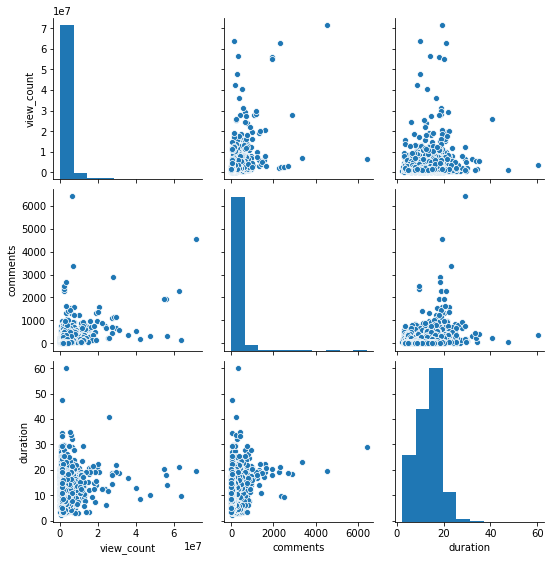

In [22]:
sns.pairplot(data=data, vars=["view_count", "comments", "duration"])
display(data[["view_count", "comments", "duration"]].corr())

We observe from the above plot that the duration of the talks does not have a correlation with either the view count or the number of comments. Let's have a look if it has any correlation with the number of likes and dislikes

In [23]:
#Duration vs Likes and Dislikes
# Duration vs Occupation

/home/mounika.k/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



technology       0.035710
science          0.030231
global issues    0.025149
culture          0.024224
TEDx             0.021650
design           0.018086
business         0.017492
innovation       0.013399
health           0.013201
society          0.013069
Name: tags, dtype: float64

0.21221122112211221

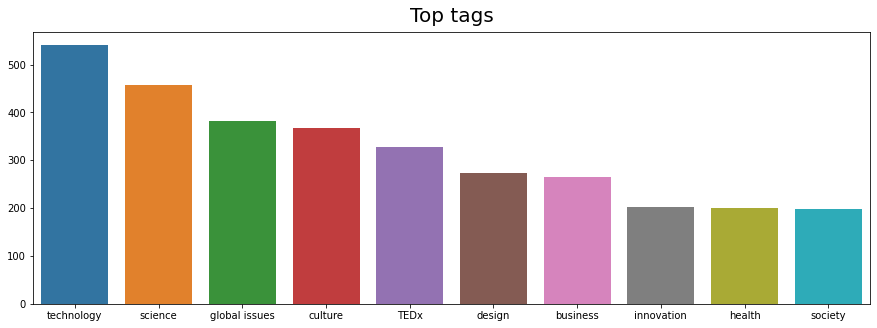

In [25]:
data["tags"] = data["tags"].apply(lambda x: ast.literal_eval(x))

tags = data["tags"].explode().value_counts().head(10)
display(data["tags"].explode().value_counts(normalize=True).head(10))
display(data["tags"].explode().value_counts(normalize=True).head(10).sum())
plt.figure(figsize=(15,5))
ax = sns.barplot(x=tags.index, y=tags.values)
ax.set_title("Top tags", pad=10, fontdict={'fontsize': 20})
plt.show()

Most talks seem to be coming Technology category, followed by Science, Global issues and Culture.
Still, top 10 tags seem to account for only 21% of the total categories.

In [27]:
data['dis_quo'] = data['comments']/data['views']

data[['title', 'speaker__name','views', 'comments', 'dis_quo', 'published_date']].sort_values('dis_quo', ascending=False).head(10)

/home/mounika.k/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,title,speaker__name,views,comments,dis_quo,published_date
74,Militant atheism,Richard Dawkins,4374792,6404,0.001464,2007-04-16 02:07:00
576,Taking imagination seriously,Janet Echelman,1832930,2492,0.001360,2011-06-07 23:36:00
483,On reading the Koran,Lesley Hazleton,1847256,2374,0.001285,2011-01-04 15:33:00
510,Curating humanity's heritage,Elizabeth Lindsey,439180,555,0.001264,2011-02-23 16:25:00
1256,How do you explain consciousness?,David Chalmers,2162764,2673,0.001236,2014-07-14 15:08:04
358,The danger of science denial,Michael Specter,1838628,2272,0.001236,2010-04-12 09:38:00
805,A new way to stop identity theft,David Birch,174326,208,0.001193,2012-06-03 14:08:36
214,What comes after An Inconvenient Truth?,Al Gore,775430,846,0.001091,2009-05-07 01:00:00
413,Superheroes inspired by Islam,Naif Al-Mutawa,819361,804,0.000981,2010-07-20 09:08:00
728,The true cost of oil,Garth Lenz,792779,775,0.000978,2012-02-18 14:54:08


Discard audio files with more than one speaker.

In [28]:
print(data['languages'][data['languages'] == 0].count())
data[data['languages'] == 0]['description']

20


197     Eric Lewis, an astonishingly talented crossove...
267     Vishal Vaid and his band explore a traditional...
389     This haunting, intimate performance by Europea...
669     The next big shift is now, and it's not what y...
683     Real narratives are complicated: Africa isn't ...
699     We don't just need better laws -- we need bett...
700     How do you measure a nebula? With a brain scan...
703     Kirk Sorensen shows us the liquid fuel thorium...
707     Scott Rickard set out to engineer the ugliest ...
724     Singer Inara George and guitarist Mike Andrews...
729     How often do you see the true beauty of the ni...
735     Were you the favorite child, the wild child or...
748     Architecture can bring people together, or div...
753     Jer Thorp creates beautiful data visualization...
784     Rick Guidotti is a fashion photographer with a...
789     The revolution that made music more marketable...
796     An average teaspoon of ocean water contains fi...
850     Giles 

Some of these cases are dance or music performance but others are talks in one language. They all will be considered with one idiom.

In [29]:
data['languages'] = data['languages'].replace(0, 1)

/home/mounika.k/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



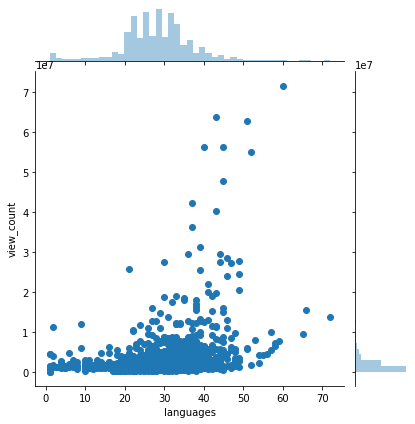

In [30]:
sns.jointplot(x='languages', y='view_count', data=data)
plt.show()

### Understanding Ratings

In [31]:
rating_names = set()
for index, row in data.iterrows():
    rating = ast.literal_eval(row['ratings'])
    for item in rating:
        rating_names.add(item['name'])
    
print(rating_names)

{'Ingenious', 'Fascinating', 'Longwinded', 'Unconvincing', 'Persuasive', 'Courageous', 'Funny', 'Obnoxious', 'Beautiful', 'Jaw-dropping', 'OK', 'Inspiring', 'Confusing', 'Informative'}


In [32]:
rating_data = defaultdict(list)
for index, row in data.iterrows():
    rating = ast.literal_eval(row['ratings'])
    rating_data['Talk_ID'].append(row['talk__id'])
    names = set()
    for item in rating:
        rating_data[item['name']].append(item['count'])
        names.add(item['name'])

rating_data = pd.DataFrame(rating_data)

rating_data.head()

,Talk_ID,Funny,Beautiful,Ingenious,Courageous,Longwinded,Confusing,Informative,Fascinating,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring
0,66,19645,4573,6073,3253,387,242,7346,10581,300,10704,4439,1174,209,24924
1,1,544,58,56,139,113,62,443,132,258,268,116,203,131,413
2,7,964,60,183,45,78,27,395,166,104,230,54,146,142,230
3,53,59,291,105,760,53,32,380,132,36,460,230,85,35,1070
4,96,1102,706,397,721,285,301,1038,1350,377,2423,669,441,335,5211


The values in each column represent the number of votes the talk received for each rating.

In [33]:
#Adding a column 'total' which is the total of votes for each talk. 
rating_data['total'] = rating_data.sum(axis = 1)
rating_data = rating_data.sort_values('total', ascending=False)  

In [34]:
def column_percentage(column):
    return (column/rating_data['total'])*100

rating_data.loc[:, (rating_data.columns != 'total') &  (rating_data.columns !='Talk_ID')] = \
    rating_data.loc[:, (rating_data.columns != 'total') &  (rating_data.columns !='Talk_ID')].apply(column_percentage)

print(rating_data.head())

     Talk_ID      Funny  Beautiful  Ingenious  Courageous  Longwinded  \
0         66  20.917629   4.869245   6.466417    3.463734    0.412070   
123      229   1.362598  13.311423   1.732164   11.061585    0.561402   
888     1569   1.388868   4.785525   2.114397    9.335623    0.500466   
480     1042   8.548757  12.994110   1.789921   13.547120    0.463024   
373      848   0.676766   2.845888   5.922571    2.014681    0.676766   

     Confusing  Informative  Fascinating  Unconvincing  Persuasive  \
0     0.257677     7.821883    11.266451      0.319434   11.397419   
123   0.407651     7.659322    20.378311      0.775806    2.403588   
888   0.291692    14.491316    16.451723      0.496024    9.205324   
480   0.253599     7.462369     7.588351      0.381217    5.742801   
373   0.194353    11.452965    12.910615      1.613827   15.348708   

     Jaw-dropping        OK  Obnoxious  Inspiring  total  
0        4.726564  1.250053   0.222539  26.538609  93916  
123     14.760064  0.8

In [35]:
count_talks = defaultdict(list)
for rating in rating_data.columns:
    if (rating != 'Talk_ID') & (rating != 'total'):
        count_talks['rating'].append(rating) 
        count_talks['count'].append(rating_data[rating_data[rating] >0][rating].count())

In [36]:
count_talks

defaultdict(list,
            {'rating': ['Funny',
              'Beautiful',
              'Ingenious',
              'Courageous',
              'Longwinded',
              'Confusing',
              'Informative',
              'Fascinating',
              'Unconvincing',
              'Persuasive',
              'Jaw-dropping',
              'OK',
              'Obnoxious',
              'Inspiring'],
             'count': [1911,
              1956,
              1958,
              1953,
              1911,
              1876,
              1953,
              1958,
              1923,
              1959,
              1958,
              1951,
              1866,
              1959]})

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

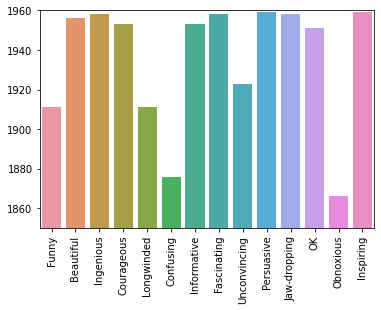

In [37]:
sns.barplot(x="rating", y="count", data=count_talks)
plt.ylim(1850, 1960)
plt.xticks(rotation='vertical')

The total number of talks is 1959. Some ratings seem to be used in all (or almost all) the talks, such as Inspiring, Ingenious, Persuasive, Jaw-dropping, and Fascinating. The positive ratings are very frequently used, while the negative ones (Obnoxious, Longwinded, Confusing and Unconvincing) are less present in the Talks.
In general all the ratings, positives and negatives, were voted in most of the talks. That shows how peoples opinion may diverge a lot.

In [38]:
rating_data

,Talk_ID,Funny,Beautiful,Ingenious,Courageous,Longwinded,Confusing,Informative,Fascinating,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring,total
0,66,20.917629,4.869245,6.466417,3.463734,0.412070,0.257677,7.821883,11.266451,0.319434,11.397419,4.726564,1.250053,0.222539,26.538609,93916
123,229,1.362598,13.311423,1.732164,11.061585,0.561402,0.407651,7.659322,20.378311,0.775806,2.403588,14.760064,0.897114,0.502158,23.863797,70894
888,1569,1.388868,4.785525,2.114397,9.335623,0.500466,0.291692,14.491316,16.451723,0.496024,9.205324,5.309682,1.671676,0.229504,31.405008,67537
480,1042,8.548757,12.994110,1.789921,13.547120,0.463024,0.253599,7.462369,7.588351,0.381217,5.742801,3.435864,0.818063,0.184882,35.085079,61120
373,848,0.676766,2.845888,5.922571,2.014681,0.676766,0.194353,11.452965,12.910615,1.613827,15.348708,4.614157,2.327034,0.510178,37.419959,57627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51,48,0.484653,0.646204,14.378029,0.646204,5.008078,15.185784,15.831987,13.570275,3.554120,1.938611,3.715670,8.562197,0.969305,7.754443,619
37,57,0.179856,1.079137,22.661871,1.978417,3.237410,0.719424,20.683453,13.309353,3.597122,4.856115,3.237410,4.136691,1.438849,8.633094,556
88,154,0.186567,1.119403,5.783582,1.492537,2.985075,0.186567,18.283582,6.156716,2.052239,6.343284,0.932836,2.985075,0.559701,22.201493,536
31,75,0.196078,2.156863,8.235294,10.392157,6.078431,2.156863,19.803922,5.294118,0.784314,10.000000,0.588235,4.901961,0.784314,13.921569,510


In [39]:
rating_data[['Funny', 'Beautiful', 'Ingenious', 'Courageous',
       'Longwinded', 'Confusing', 'Informative', 'Fascinating', 'Unconvincing',
       'Persuasive', 'Jaw-dropping', 'OK', 'Obnoxious', 'Inspiring']].apply(np.argmax, axis = 1)

0      13
123    13
888    13
480    13
373    13
       ..
51      6
37      2
88     13
31      6
63      1
Length: 1959, dtype: int64

In [40]:
len(['Funny', 'Beautiful', 'Ingenious', 'Courageous',
       'Longwinded', 'Confusing', 'Informative', 'Fascinating', 'Unconvincing',
       'Persuasive', 'Jaw-dropping', 'OK', 'Obnoxious', 'Inspiring'])

14

In [41]:
rating_values = rating_data.loc[:, (rating_data.columns != 'total') &  (rating_data.columns !='Talk_ID')] 
rating_data['main_rating'] = rating_values.apply(np.argmax, axis = 1)

rating_data['main_rating'].shape

(1959,)

In [42]:
cols = ['Funny', 'Beautiful', 'Ingenious', 'Courageous',
       'Longwinded', 'Confusing', 'Informative', 'Fascinating', 'Unconvincing',
       'Persuasive', 'Jaw-dropping', 'OK', 'Obnoxious', 'Inspiring']

# Error Check

https://www.kaggle.com/anandaribeiro/understanding-ted-talks-ratings

([<matplotlib.axis.XTick at 0x7fd77c609940>,
 [Text(0, 0, 'Courageous'),
  Text(0, 0, 'Longwinded'),
  Text(0, 0, 'Confusing'),
  Text(0, 0, 'Informative'),
  Text(0, 0, 'Jaw-dropping'),
  Text(0, 0, 'OK'),
  Text(0, 0, 'Beautiful'),
  Text(0, 0, 'Ingenious'),
  Text(0, 0, 'Persuasive'),
  Text(0, 0, 'Fascinating'),
  Text(0, 0, 'Unconvincing'),
  Text(0, 0, 'Obnoxious'),
  Text(0, 0, 'Inspiring'),
  Text(0, 0, 'Funny')])

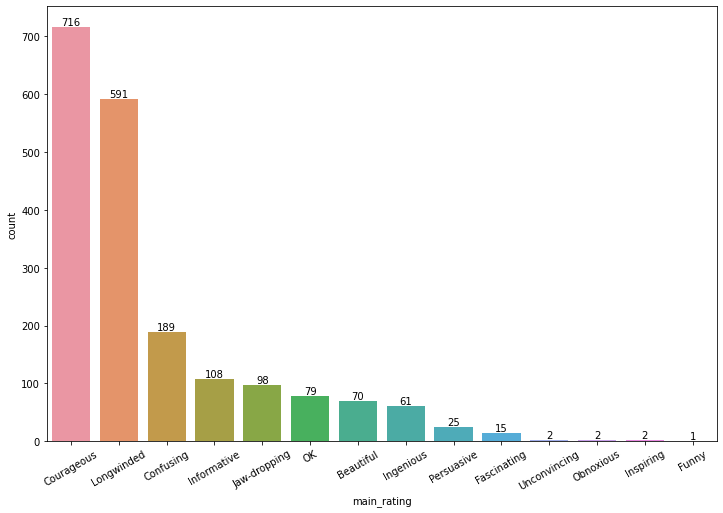

In [43]:
label_order = rating_data['main_rating'].value_counts().sort_values(ascending = False).index
xticks = [x for _,x in sorted(zip(list(label_order), cols))]
f, ax = plt.subplots(figsize=(12, 8))
ax = sns.countplot(x = 'main_rating', data = rating_data, order = label_order)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:d}'.format(height),
            ha="center") 
plt.xticks(list(range(14)), xticks, rotation=30)

Text(0, 0.5, 'Percentage of Votes')

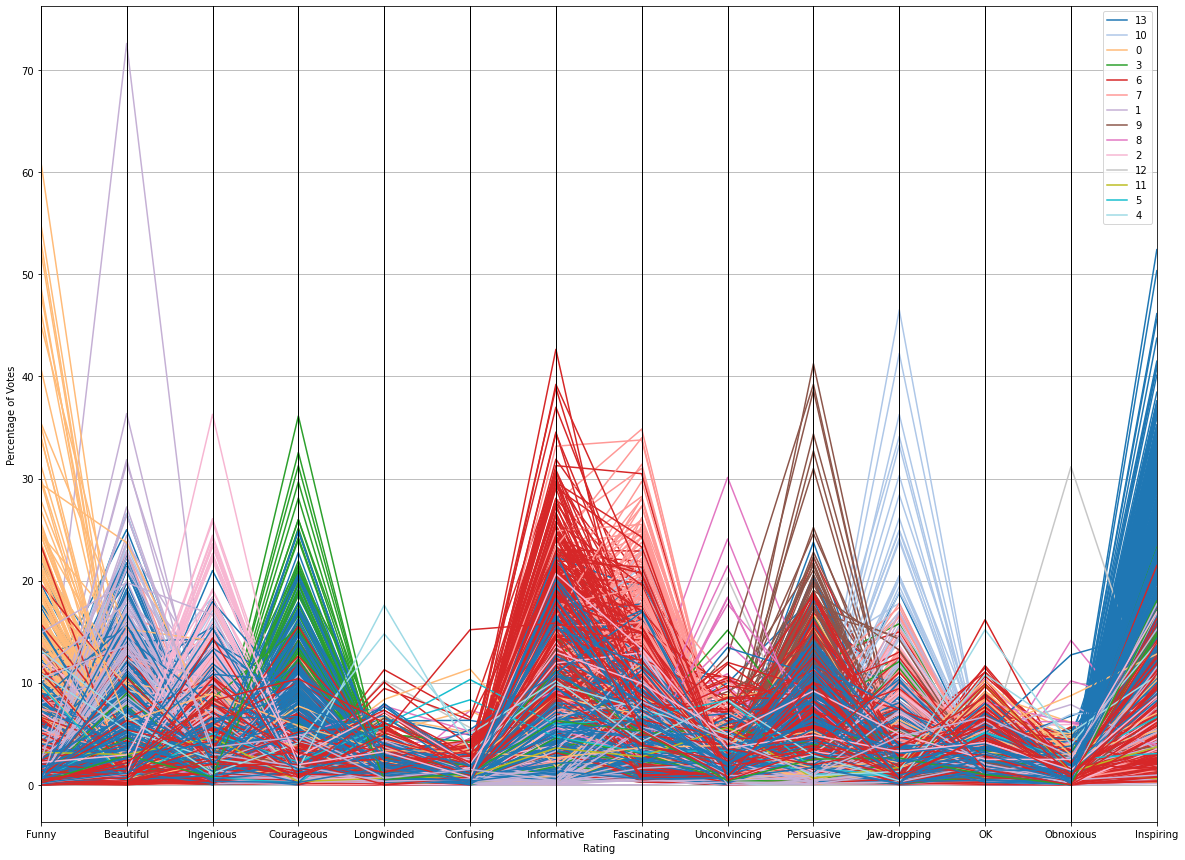

In [44]:
rating_values_updated = rating_data.loc[:, (rating_data.columns != 'total') &  (rating_data.columns !='Talk_ID')]
plt.figure(figsize=(20,15))
parallel_coordinates(rating_values_updated, 'main_rating', colormap=plt.get_cmap("tab20"))
plt.xlabel("Rating")
plt.ylabel("Percentage of Votes")

In [45]:
rating_data

,Talk_ID,Funny,Beautiful,Ingenious,Courageous,Longwinded,Confusing,Informative,Fascinating,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring,total,main_rating
0,66,20.917629,4.869245,6.466417,3.463734,0.412070,0.257677,7.821883,11.266451,0.319434,11.397419,4.726564,1.250053,0.222539,26.538609,93916,13
123,229,1.362598,13.311423,1.732164,11.061585,0.561402,0.407651,7.659322,20.378311,0.775806,2.403588,14.760064,0.897114,0.502158,23.863797,70894,13
888,1569,1.388868,4.785525,2.114397,9.335623,0.500466,0.291692,14.491316,16.451723,0.496024,9.205324,5.309682,1.671676,0.229504,31.405008,67537,13
480,1042,8.548757,12.994110,1.789921,13.547120,0.463024,0.253599,7.462369,7.588351,0.381217,5.742801,3.435864,0.818063,0.184882,35.085079,61120,13
373,848,0.676766,2.845888,5.922571,2.014681,0.676766,0.194353,11.452965,12.910615,1.613827,15.348708,4.614157,2.327034,0.510178,37.419959,57627,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51,48,0.484653,0.646204,14.378029,0.646204,5.008078,15.185784,15.831987,13.570275,3.554120,1.938611,3.715670,8.562197,0.969305,7.754443,619,6
37,57,0.179856,1.079137,22.661871,1.978417,3.237410,0.719424,20.683453,13.309353,3.597122,4.856115,3.237410,4.136691,1.438849,8.633094,556,2
88,154,0.186567,1.119403,5.783582,1.492537,2.985075,0.186567,18.283582,6.156716,2.052239,6.343284,0.932836,2.985075,0.559701,22.201493,536,13
31,75,0.196078,2.156863,8.235294,10.392157,6.078431,2.156863,19.803922,5.294118,0.784314,10.000000,0.588235,4.901961,0.784314,13.921569,510,6


In [46]:
ted_basic_info = data[['talk__id', 'title', 'duration','comments','view_count','languages']]
ted_basic_info.columns = ['Talk_ID','title', 'duration','comments','view_count','languages']

In [47]:
rating_and_basic = ted_basic_info.merge(rating_data, how = 'left', on = ['Talk_ID'])

(0.0, 10000000.0)

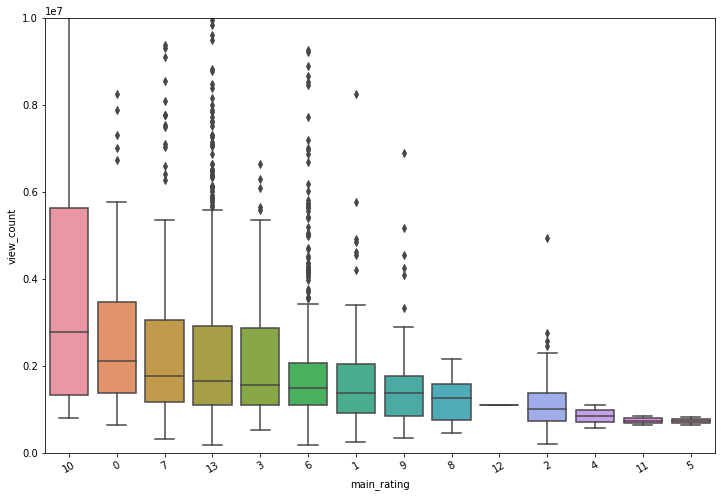

In [48]:
list_ordered_by_median = rating_and_basic.groupby('main_rating')['view_count'].median().sort_values(ascending = False).index

f, ax = plt.subplots(figsize=(12, 8))
ax = sns.boxplot(x="main_rating", y="view_count", data=rating_and_basic, order = list_ordered_by_median)
plt.xticks(rotation=30)
plt.ylim((0,10000000))

/home/mounika.k/.local/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



Text(0.5, 1.0, 'Heatmap of Correlation between Features')

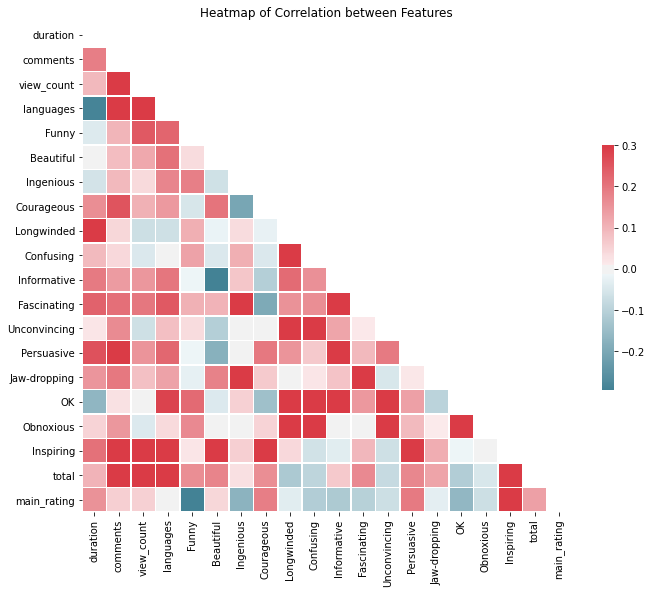

In [49]:
#Features to remove from the plot:
features_to_remove = ['Talk_ID', 'title']
corr = rating_and_basic.drop(features_to_remove, axis = 1).corr() 
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Heatmap of Correlation between Features')

According to the heatmap, there are two strong negative correlations:

- duration and languages. That was already observed in the bloxplots analyses.
- Informative and Beautiful. That shows that the talks are voted for one or another of these ratings. They are not usually used together.

And there are many positive correlations. Some interesting examples:

- Confusing, Unconvincing, OK, Longwinded and Obnoxious. All the negative ratings are usually voted together.
- comments, views, languages and the total of votes. These features are positively correlated. 
- This behavior already appeared in previous analyses, except for the variable languages.
- Longwinded and duration. As expected, according to previous analyses.
- Jaw-dropping, Fascinating and Ingenious. These ratings are different but it seems they are frequently used together by the viewers.
- Persuasive and comments. It was expected from the boxplots analysis. This relation will be explored below.

### Tags

In [50]:
tags_data = defaultdict(list)
for index, row in data.iterrows():
    themes = row['tags']
    for item in themes:
        tags_data['Talk_ID'].append(row['talk__id'])
        tags_data['tags'].append(item)

tags_data = pd.DataFrame(tags_data)

print(len(tags_data))
print(len(tags_data['tags'].unique()))
tags_data.head()

15150
413


,Talk_ID,tags
0,66,children
1,66,creativity
2,66,culture
3,66,dance
4,66,education


The total number of tags used is 15150. However there are only 413 unique tags.

In [51]:
data.title

0                             Do schools kill creativity?
1                             Averting the climate crisis
2                                        Simplicity sells
3                                     Greening the ghetto
4                                    Why we do what we do
                              ...                        
1954    What we're missing in the debate about immigra...
1955                      The most Martian place on Earth
1956    What intelligent machines can learn from a sch...
1957         A black man goes undercover in the alt-right
1958    How a video game might help us build better ci...
Name: title, Length: 1959, dtype: object

### Popular TED Speakers 

In [52]:
speaker_df = data.groupby('speaker__name').count().reset_index()[['speaker__name', 'comments']]
speaker_df.columns = ['speaker__name', 'appearances']
speaker_df = speaker_df.sort_values('appearances', ascending=False)
speaker_df.head(10)

,speaker__name,appearances
833,Juan Enriquez,6
1341,Rives,5
841,Julian Treasure,5
805,Jonathan Haidt,4
1005,Marco Tempest,4
202,Bill Gates,4
597,Hans Rosling,4
932,Lawrence Lessig,4
658,Jacqueline Novogratz,4
334,Dan Ariely,4


### Occupation Wise Rating

### Computing Likes, Dislikes and Scores

In [53]:
pos_labels = ['Fascinating', 'Ingenious','Jaw-dropping'] 
neg_labels = ['Longwinded','Unconvincing', 'OK']

for index, row in data.iterrows():
    x = ast.literal_eval(row['ratings'])
    likes = 0
    dislikes = 0
    for i in x:
        if i['name'] in pos_labels:
#             print('likes', likes)
            likes += i['count']
        elif i['name'] in neg_labels:
            dislikes += i['count']
    data.loc[index, 'likes'] = likes
    data.loc[index, 'dislikes'] = dislikes

/home/mounika.k/.local/lib/python3.7/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/mounika.k/.local/lib/python3.7/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [54]:
data['scores'] = (data['comments'] + data['likes'] + data['dislikes'])/data['views']

/home/mounika.k/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [55]:
data.shape

(1959, 27)

### Speech Patterns Between the Different Rating Types

In [68]:
path = '/ssd_scratch/users/mounika.k/ted_audio_features_final/'

In [69]:
rfiles = os.listdir(path + 'rmse/')

rmse_data = []
for file in rfiles:
    rmse_data.append(np.load(path + 'rmse/' + file))
rmse_arr = np.vstack(rmse_data)
rmse_arr.shape

(1836, 12920)

In [70]:
rmse_mean = np.mean(rmse_arr, axis=1)

In [71]:
vcfiles = os.listdir(path + 'vc/')
vc_data = []
for file in vcfiles:
    vc_data.append(np.load(path + 'vc/' + file))
vc_arr = np.vstack(vc_data)
vc_arr.shape

(1836, 5)

In [72]:
vc_df = pd.DataFrame(vc_arr, columns=['pausedur', 'speakingrate', 'articulationrate', 'asd', 'unvoicedcount'])

In [73]:
vc_df['rmse_mean'] = list(rmse_mean)

In [74]:
files = [f.replace('.npy', '') for f in rfiles]

In [75]:
data = data.astype({"talk__id": 'str'})

In [76]:
sub_df = data[data['talk__id'].isin(files)]

In [77]:
vc_df['talk_id'] = files

In [78]:
sub_df.columns

Index(['comments', 'languages', 'views', 'view_count', 'event_y', 'ratings',
       'speaker_occupation', 'speaker__name', 'label', 'transcript',
       'talk__id', 'is_talk_featured', 'tags', 'description', 'title',
       'speaker__id', 'published_date', 'duration_y', 'speaker__is_published',
       'interaction', 'month', 'year', 'duration', 'dis_quo', 'likes',
       'dislikes', 'scores'],
      dtype='object')

Ignoring ratings for now.

In [79]:
sub_df.speaker_occupation.value_counts()

Writer                       37
Journalist                   25
Psychologist                 23
Artist                       23
Designer                     22
                             ..
Military strategist           1
Writer and radio producer     1
Positive psychologist         1
High school principal         1
TV host                       1
Name: speaker_occupation, Length: 1143, dtype: int64

In [80]:
cols = ['comments', 'views', 'speaker_occupation', 'label', 'talk__id', 'view_count', 'interaction', 'dis_quo', 'likes', 'dislikes', 'scores']

In [81]:
ted_speech_df = pd.merge(sub_df[cols], vc_df, left_on='talk__id', right_on='talk_id')

In [82]:
ted_speech_df

,comments,views,speaker_occupation,label,talk__id,view_count,interaction,dis_quo,likes,dislikes,scores,pausedur,speakingrate,articulationrate,asd,unvoicedcount,rmse_mean,talk_id
0,4553,47227110,Author/educator,1.0,66,71557707,10373.0,0.000096,21093.0,1861.0,0.000582,1255.627624,3.809265,4.218563,0.237048,3.0,0.073813,66
1,265,3200520,Climate advocate,0.0,1,3626549,12077.0,0.000083,304.0,574.0,0.000357,962.325746,3.012043,3.739679,0.267403,15.0,0.150411,1
2,124,1636292,Technology columnist,1.0,7,1993146,13196.0,0.000076,403.0,328.0,0.000523,972.312685,3.662931,3.926790,0.254661,23.0,0.175868,7
3,200,1697550,Activist for environmental justice,1.0,53,2910867,8488.0,0.000118,467.0,174.0,0.000495,1038.067460,3.885016,4.023853,0.248518,11.0,0.248831,53
4,672,20685401,Life coach; expert in leadership psychology,1.0,96,29436879,30782.0,0.000032,2416.0,1103.0,0.000203,1160.699297,4.508923,5.106969,0.195811,20.0,0.138598,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1831,17,450430,Journalist,1.0,2879,1201578,26496.0,0.000038,44.0,15.0,0.000169,592.874971,3.308832,4.362520,0.229225,27.0,0.067967,2879
1832,6,417470,Astrobiologist,1.0,2869,1223962,69578.0,0.000014,46.0,14.0,0.000158,435.121501,3.653118,4.575251,0.218567,10.0,0.080002,2869
1833,10,375647,Robotics engineer,1.0,2870,1298325,37565.0,0.000027,44.0,5.0,0.000157,767.310562,3.919800,4.841662,0.206541,10.0,0.079495,2870
1834,32,419309,Public intellectual,1.0,2887,4600702,13103.0,0.000076,83.0,14.0,0.000308,1262.811297,3.622595,4.558674,0.219362,20.0,0.073205,2887


In [83]:
ted_speech_df['dislike_like_ratio'] = ted_speech_df['dislikes'] / ted_speech_df['likes']

In [84]:
ted_speech_df

,comments,views,speaker_occupation,label,talk__id,view_count,interaction,dis_quo,likes,dislikes,scores,pausedur,speakingrate,articulationrate,asd,unvoicedcount,rmse_mean,talk_id,dislike_like_ratio
0,4553,47227110,Author/educator,1.0,66,71557707,10373.0,0.000096,21093.0,1861.0,0.000582,1255.627624,3.809265,4.218563,0.237048,3.0,0.073813,66,0.088228
1,265,3200520,Climate advocate,0.0,1,3626549,12077.0,0.000083,304.0,574.0,0.000357,962.325746,3.012043,3.739679,0.267403,15.0,0.150411,1,1.888158
2,124,1636292,Technology columnist,1.0,7,1993146,13196.0,0.000076,403.0,328.0,0.000523,972.312685,3.662931,3.926790,0.254661,23.0,0.175868,7,0.813896
3,200,1697550,Activist for environmental justice,1.0,53,2910867,8488.0,0.000118,467.0,174.0,0.000495,1038.067460,3.885016,4.023853,0.248518,11.0,0.248831,53,0.372591
4,672,20685401,Life coach; expert in leadership psychology,1.0,96,29436879,30782.0,0.000032,2416.0,1103.0,0.000203,1160.699297,4.508923,5.106969,0.195811,20.0,0.138598,96,0.456540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1831,17,450430,Journalist,1.0,2879,1201578,26496.0,0.000038,44.0,15.0,0.000169,592.874971,3.308832,4.362520,0.229225,27.0,0.067967,2879,0.340909
1832,6,417470,Astrobiologist,1.0,2869,1223962,69578.0,0.000014,46.0,14.0,0.000158,435.121501,3.653118,4.575251,0.218567,10.0,0.080002,2869,0.304348
1833,10,375647,Robotics engineer,1.0,2870,1298325,37565.0,0.000027,44.0,5.0,0.000157,767.310562,3.919800,4.841662,0.206541,10.0,0.079495,2870,0.113636
1834,32,419309,Public intellectual,1.0,2887,4600702,13103.0,0.000076,83.0,14.0,0.000308,1262.811297,3.622595,4.558674,0.219362,20.0,0.073205,2887,0.168675


In [85]:
tgt_cols = ['comments', 'views', 'label',
       'view_count', 'interaction', 'dis_quo', 'likes', 'dislikes', 'scores',
       'pausedur', 'speakingrate', 'articulationrate', 'asd', 'unvoicedcount',
       'rmse_mean']

In [86]:
data.ratings

0       [{'id': 7, 'name': 'Funny', 'count': 19645}, {...
1       [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...
2       [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...
3       [{'id': 3, 'name': 'Courageous', 'count': 760}...
4       [{'id': 7, 'name': 'Funny', 'count': 1102}, {'...
                              ...                        
1954    [{'id': 3, 'name': 'Courageous', 'count': 24},...
1955    [{'id': 22, 'name': 'Fascinating', 'count': 32...
1956    [{'id': 1, 'name': 'Beautiful', 'count': 14}, ...
1957    [{'id': 11, 'name': 'Longwinded', 'count': 3},...
1958    [{'id': 21, 'name': 'Unconvincing', 'count': 2...
Name: ratings, Length: 1959, dtype: object

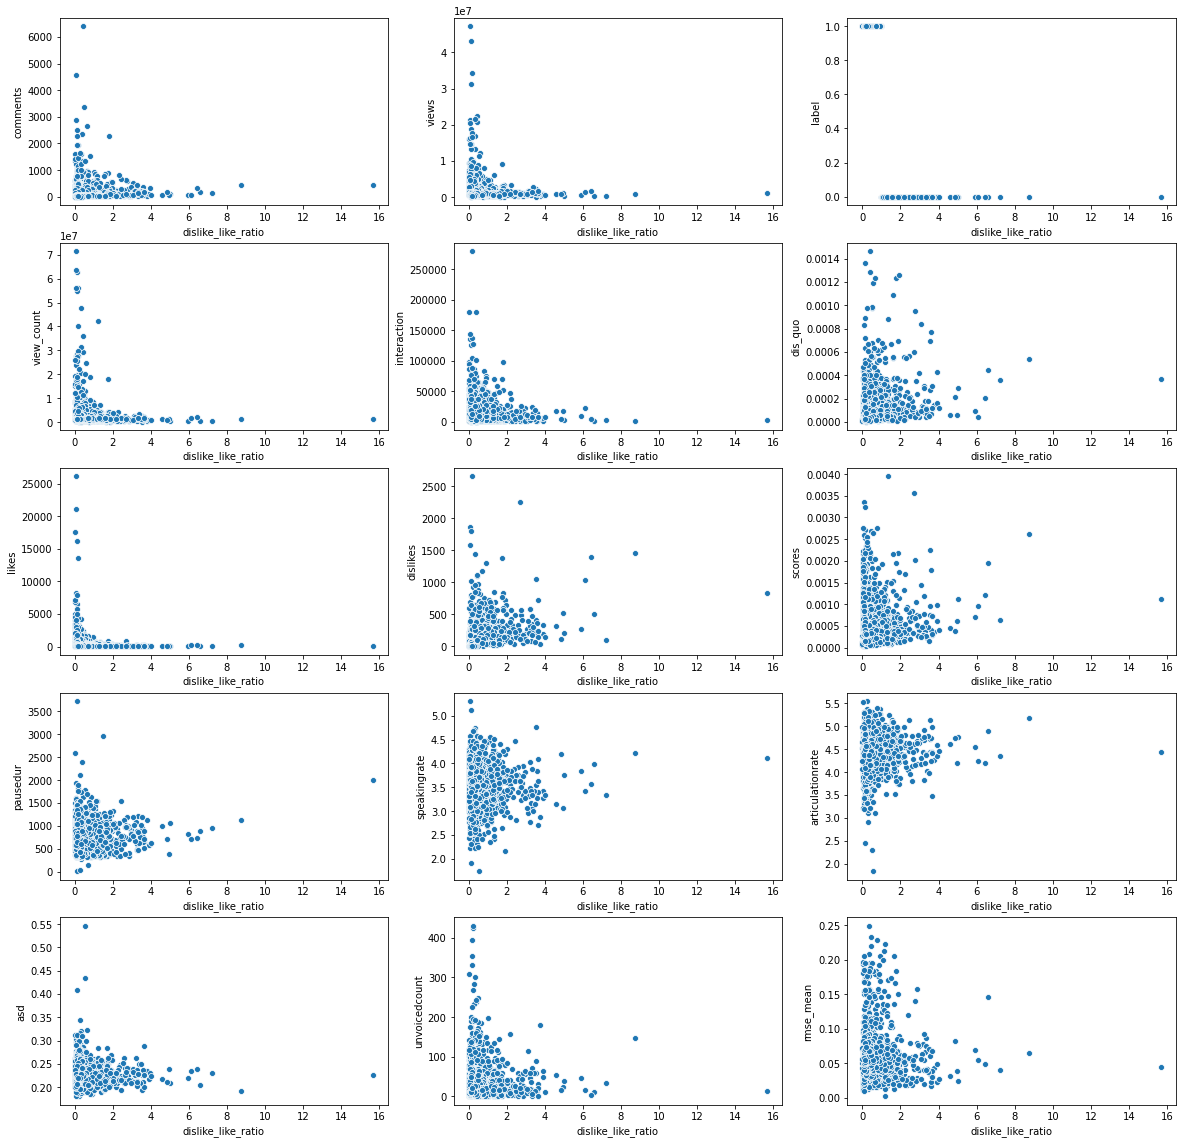

In [87]:
a = 5
b = 3
c = 1
fig = plt.figure(figsize=(20, 20))
for row_idx, col in enumerate(tgt_cols):
    plt.subplot(a, b, c)
    sns.scatterplot(x=ted_speech_df['dislike_like_ratio'], y=ted_speech_df[col])
    plt.xlabel('dislike_like_ratio')
    plt.ylabel(col)
    c += 1
plt.show()

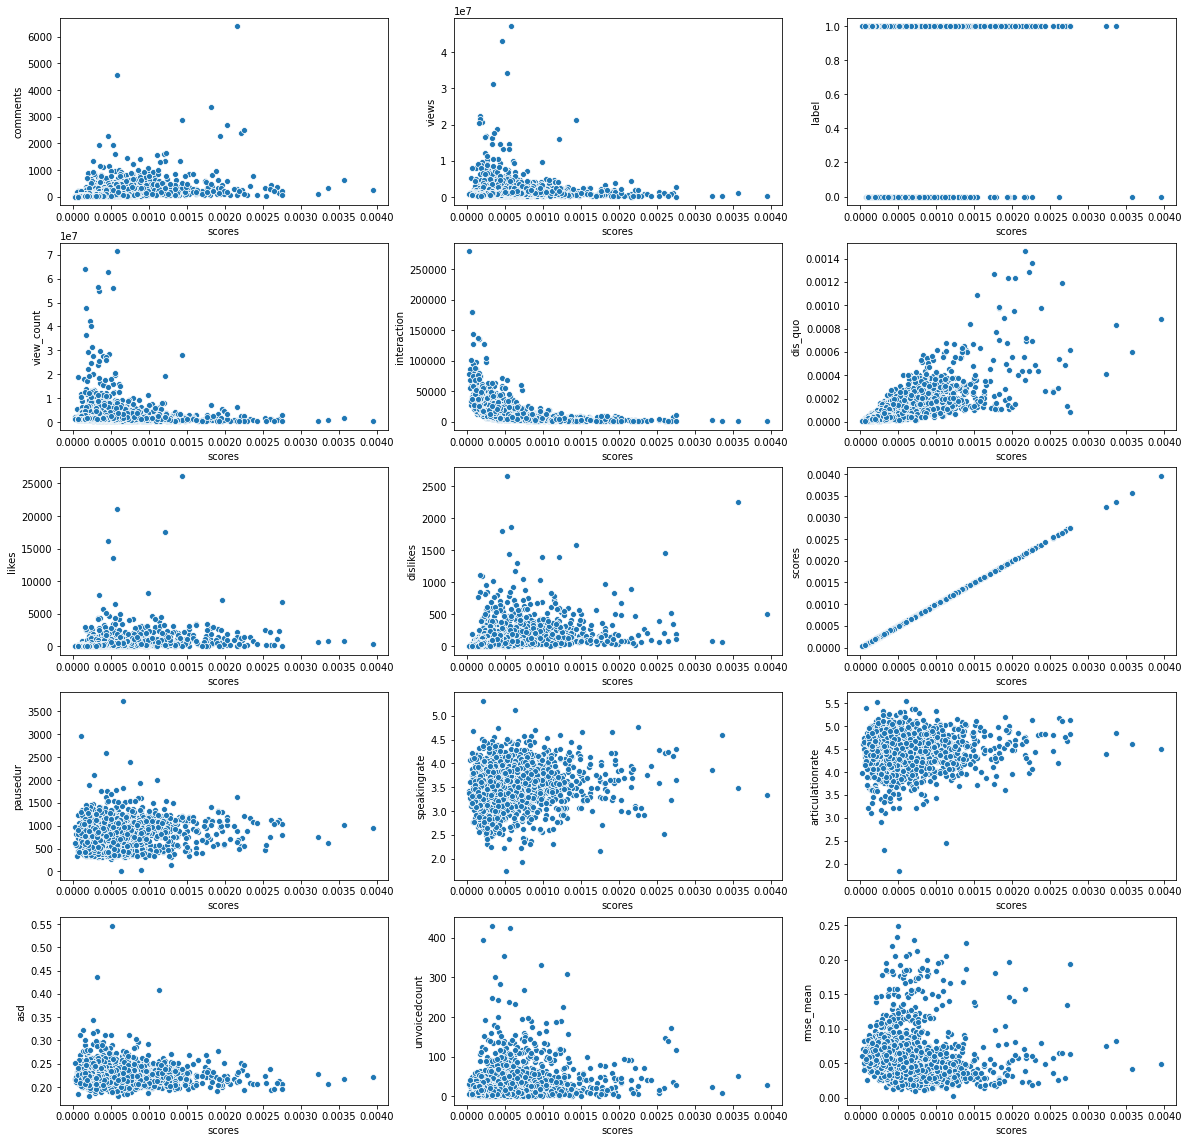

In [88]:
a = 5
b = 3
c = 1
fig = plt.figure(figsize=(20, 20))
for row_idx, col in enumerate(tgt_cols):
    plt.subplot(a, b, c)
    sns.scatterplot(x=ted_speech_df['scores'], y=ted_speech_df[col])
    plt.xlabel('scores')
    plt.ylabel(col)
    c += 1
plt.show()

### Outlier Analysis

(array([1.75e+03, 5.80e+01, 1.00e+01, 9.00e+00, 5.00e+00, 0.00e+00,
        1.00e+00, 1.00e+00, 0.00e+00, 2.00e+00]),
 array([  117756. ,  4828691.4,  9539626.8, 14250562.2, 18961497.6,
        23672433. , 28383368.4, 33094303.8, 37805239.2, 42516174.6,
        47227110. ]),
 <a list of 10 Patch objects>)

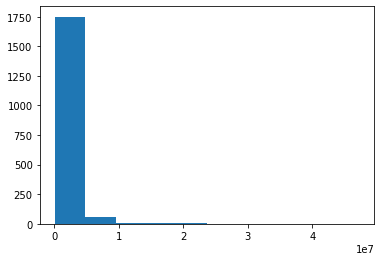

In [89]:
plt.hist(ted_speech_df['views'])

In [90]:
ted_speech_df['views'].describe(percentiles=[0.05,0.10,0.25,0.5,0.75,0.9,0.95])

count    1.836000e+03
mean     1.829691e+06
std      2.707271e+06
min      1.177560e+05
5%       4.621845e+05
10%      5.928145e+05
25%      8.696280e+05
50%      1.205220e+06
75%      1.801467e+06
90%      3.162710e+06
95%      4.693844e+06
max      4.722711e+07
Name: views, dtype: float64

Low dlr indices count for 459
High dlr indices count for 317



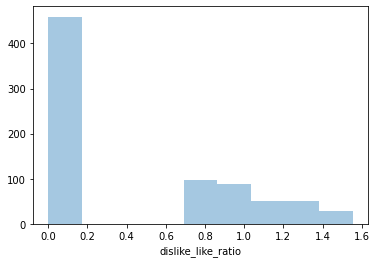

In [91]:
low_dlr_indices = []
high_dlr_indices = []

# for channel_title in h1_df['channelTitle'].unique():
# x_df = h1_df[h1_df['channelTitle'] == channel_title]

q25, q75 = np.percentile(ted_speech_df['dislike_like_ratio'], [25, 75])
iqr = q75 - q25

idx = []

valid_idx = ted_speech_df.index[((ted_speech_df['dislike_like_ratio'] <= q25) & 
                        (ted_speech_df['dislike_like_ratio'] > q25 - iqr*1.5))]

idx.extend(valid_idx.tolist())

print('Low dlr indices count for {}'.format(len(valid_idx)))
low_dlr_indices.extend(valid_idx.tolist())

valid_idx = ted_speech_df.index[((ted_speech_df['dislike_like_ratio'] >= q75) & 
                        (ted_speech_df['dislike_like_ratio'] < q75 + iqr*1.5))]

idx.extend(valid_idx.tolist())

print('High dlr indices count for {}\n'.format(len(valid_idx)))
high_dlr_indices.extend(valid_idx.tolist())

plt.figure()
sns.distplot(ted_speech_df.loc[idx]['dislike_like_ratio'], kde=False)
# plt.title(channel_title)
    
plt.show()

In [92]:
ted_speech_df.columns

Index(['comments', 'views', 'speaker_occupation', 'label', 'talk__id',
       'view_count', 'interaction', 'dis_quo', 'likes', 'dislikes', 'scores',
       'pausedur', 'speakingrate', 'articulationrate', 'asd', 'unvoicedcount',
       'rmse_mean', 'talk_id', 'dislike_like_ratio'],
      dtype='object')

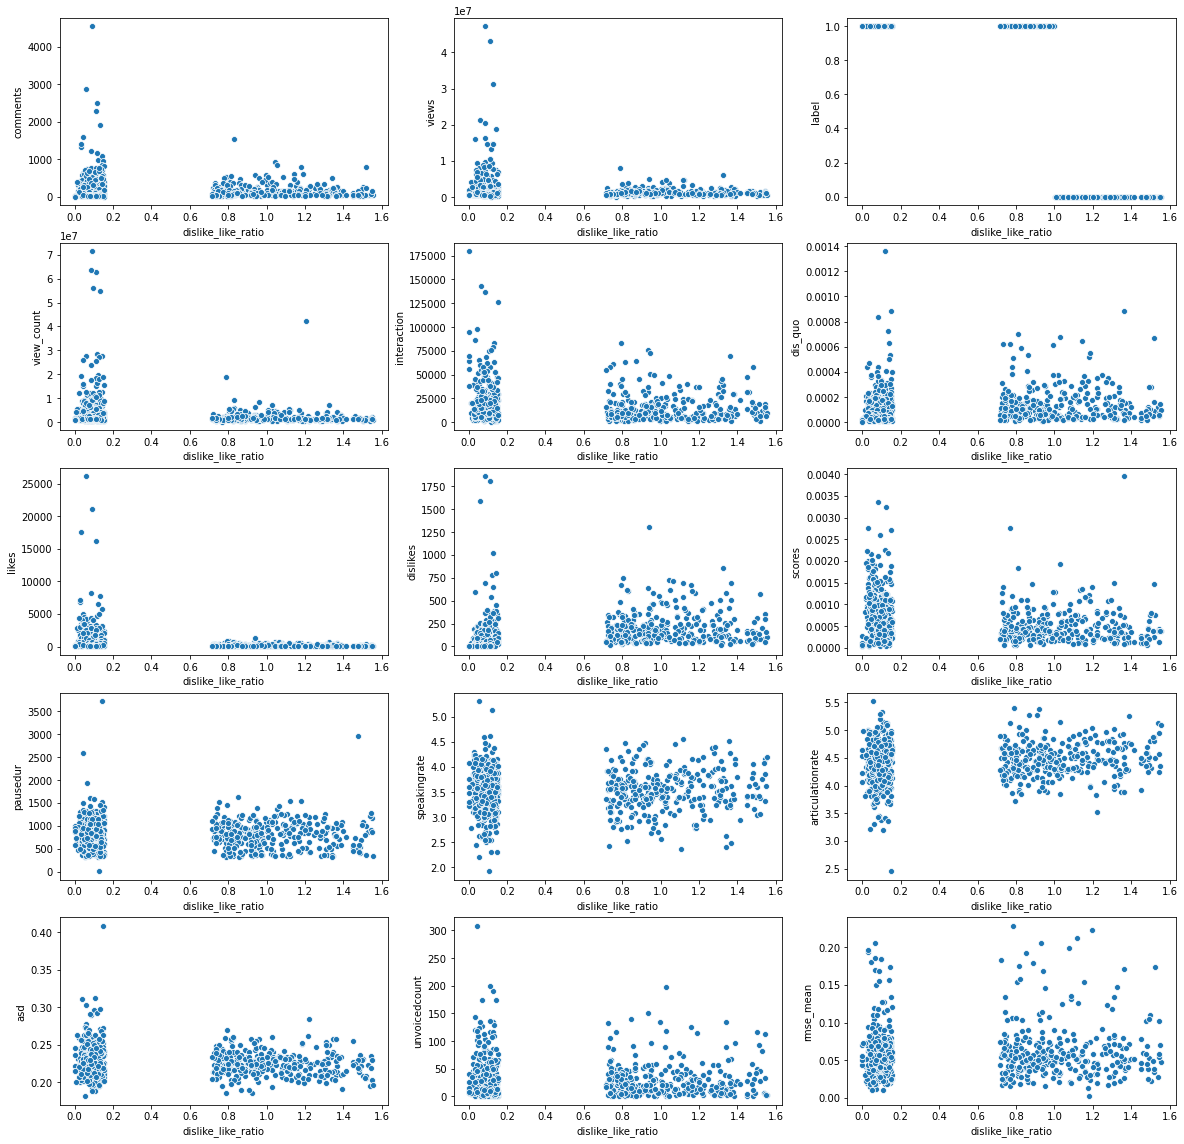

In [97]:
a = 5
b = 3
c = 1
fig = plt.figure(figsize=(20, 20))
for row_idx, col in enumerate(tgt_cols):
    df = ted_speech_df.loc[low_dlr_indices + high_dlr_indices]
    plt.subplot(a, b, c)
    sns.scatterplot(x=df['dislike_like_ratio'], y=df[col])
    plt.xlabel('dislike_like_ratio')
    plt.ylabel(col)
    c += 1
# plt.show()
plt.savefig('ted_like_dislike_ratio.png')

domain-wise dislike-like ratio

In [ ]:
data.columns

topic-wise patterns
non-semantic embeddings
domain classifier (speech)
triplet loss for positive and negative samples(manual & model)(check for narrator popularity)
